# Multiprocessing

El paquete `multiproccessing` permite generar procesos. La ejecució *concurrente* la lleva acabo el intérprete de Python (escrito en C `CPython`). El paquete ofrece concurrencia tanto local como remota, por medio del Interpretre de bloqueo global (GIL. Debido a esto, el módulo `multiprocessing` permite al programador aprovechar al máximo múltiples procesadores en una máquina determinada. La ejecución de multiples procesos creados con `multiprocessing` es posible tanto en Unix como en Windows.

## GIL: Global Interpreter Lock

Es el mecanismo utilizado por el intérprete CPython para garantizar que solo un subproceso ejecute el código de bytes (*bytecode*) de Python a la vez. Esto simplifica la implementación de CPython al hacer que el modelo de objetos esté implícitamente seguro contra el acceso concurrente.
El GIL funciona como un mecanismo de sincronización en la ejecución de procesos (e hilos) tal que únicamente un proceso (o hilo) puede ejecutarse a la vez, aún en un procesador multi-core.

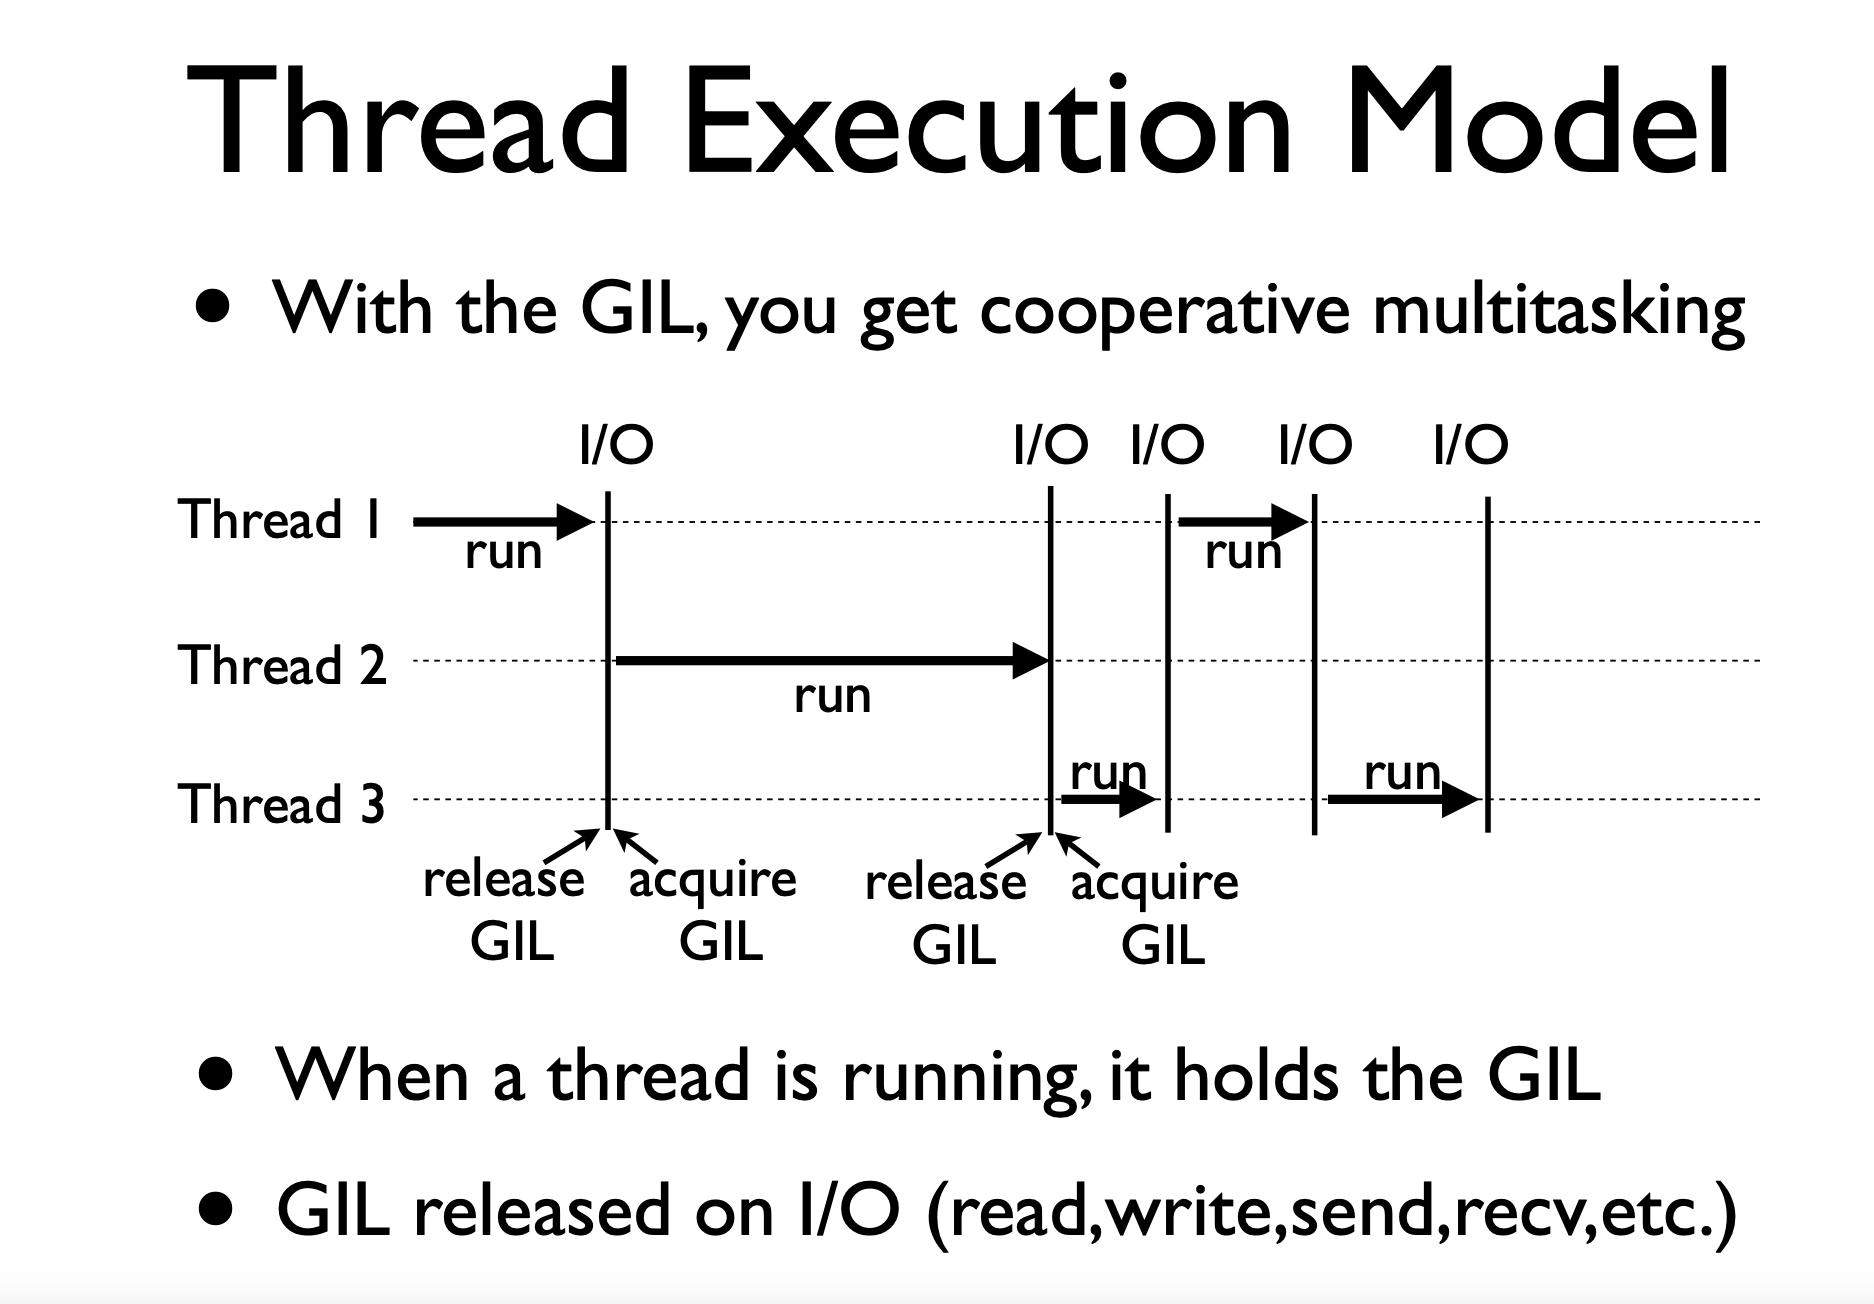

In [5]:
from IPython.display import Image
Image("gil_beazley.png", width=550, height=500)

In [3]:
import multiprocessing

Con el método `cpu_count()` se muestra el número de procesadores del sistema que se está utilizando.

In [ ]:
multiprocessing.cpu_count()

El identificador del proceso actual se accede por medio de `current_process` 

print(multiprocessing.current_process().pid)

Con la función `Process()` se crea un proceso hijo que ejecuta la tarea especificada en el valor del argumento `target`.

In [ ]:
import time

En el siguiente ejemplo se muestra como crear un proceso como un __objeto (POO)__ por medio de la definición de la clase `MyProcess` que hereda de la clase base `multiprocessing.Process`. La clase creada incluye un constructor y el método `run`. 

In [ ]:
class MyProcess(multiprocessing.Process):
    def __init__(self):
        super(MyProcess, self).__init__()

    def run(self):
        print("Child Process PID: {}".format(multiprocessing.current_process().pid))

def main():
    print("Main Process PID: {}".format(multiprocessing.current_process().pid))
    myProcess = MyProcess()
    myProcess.start()
    myProcess.join()
        
main()

## Esperar la ejecución de procesos

La clase `Process` del módulo `multiprocessing` provee el método `join()` como una forma de esperar que un proceso creado finalice su tarea y salga de su ejecución.

No obstante, a veces se requiere **crear procesos que corran en silencio (_background_) y no bloquear el proceso principal hasta que finalicen**. Esta especificación es comunmente utilizada cuando el proceso principal no tiene la certeza de interrumpir el proceso en un momento específico o cuando al finalizar el proceso principal no se tengan afectaciones por no terminar otro proceso.

Estos procesos se llaman __Proceso demonio (daemon processes__. Por medio del atributo daemon del método Process se crea un proceso de este tipo. El valor por defecto del atributo daemon es False, se define a True para crear el proceso demonio.

In [ ]:
from multiprocessing import Process, current_process
import time

def f1():
    p = current_process()
    print('Starting process %s, ID %s...' % (p.name, p.pid))
    time.sleep(4)
    print('Exiting process %s, ID %s...' % (p.name, p.pid))

def f2():
    p = current_process()
    print('Starting process %s, ID %s...' % (p.name, p.pid))
    time.sleep(2)
    print('Exiting process %s, ID %s...' % (p.name, p.pid))

if __name__ == '__main__':
    p1 = Process(name='Worker 1', target=f1)
    p1.daemon = True
    p2 = Process(name='Worker 2', target=f2)
    
    p1.start()
    time.sleep(1)
    p2.start()

El proceso `p1` es un proceso demonio y el proceso `p2` es un proceso convencional. La ejecución del primer proceso es más larga que la del segundo, por lo que es muy posible que el proceso `p2` finalice antes del proceso `p1`. Debido a que `p1` es un proceso demonio, el proceso principal deberá finalizar antes que el proceso `p1` termine.

Otra forma de usar los procesos demonios consiste en esperar su ejecución un periodo de tiempo específico antes de terminarlos prematuramente. Las combinación de los procesos demonio con el método `join()` permite determinar un tiempo específico de espera antes de la finalización de un proceso. Por medio del paso de un argumento (número de segundos de espera) al método `join()` de un proceso demonio, se crea una ventana de tiempo de ejecución del proceso después del cual se finalizará haya o no terminado su tarea. 

In [ ]:
if __name__ == '__main__':
    p1 = Process(name='Worker 1', target=f1)
    p1.daemon = True
    p2 = Process(name='Worker 2', target=f2)
    
    p1.start()
    time.sleep(1)
    p2.start()
    
    p1.join(1)
    print('Whether Worker 1 is still alive:', p1.is_alive())
    p2.join()

Vemos que el proceso `p1` permanece en ejecución y continua vivo el tiempo que se ha indicado en proceso principal.

### Finalización de procesos

El método `terminate()` ofrece una forma rápida de terminar un proceso. Es importante mencionar que los procesos hijos que del proceso que termina no son finalizados al realizar la llamada a `terminate()`, estos procesos se denominarán **procesos huérfanos**.

Aunque finalizar un proceso puede ser mal visto, algunas veces es necesario si existe algún problema al realizar tareas de _comunicación interprocesos_.

Al utlizar `terminate()` es importante hacer la llamada a `join()` también debido a que no es inmediata la actualización del estado `alive` del proceso.